# K-means Clustering

#### To classify News articles as belonging to 5 categories (binary classification)

Any editing needs to be done only in the cells marked with "Tune hyperparameters here"




Useful notebook shortcuts:

Ctrl+Enter -> Run current cell

Shift+Enter -> Run current cell and go to next cell

Alt+Enter -> Run current cell and add new cell below

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
#from model import *
from feature import *
#from utils import *

### Load the training data

In [10]:
# Change the path to the training data directory
data = readfiles1('joined')

In [11]:
# Initialize the model and preprocess
bow = BagOfWordsFeatureExtractor()
bow.preprocess(data)

In [12]:
# Extract fetures and create a numpy array of features
X_data_bow = bow.extract(data)

In [13]:
from model import *

model1 = Kmeans()
#model1.train(X_train_bow, Y_train_bow, lr, reg_const)
labels = model1.cluster(X_data_bow, k=5, n_iter=25)

0.0811557696219
0.0715346835762
0.0712433062168
0.0709696641807
0.0707627605683
0.0705975878162
0.070448509441
0.0702837123412
0.070142382045
0.0700036196581
0.0700237195721
0.0700719677328
0.0700896061941
0.070090130318
0.0700971478259
0.0700910844575
0.0700897699476
0.0700799204485
0.0700787199852
0.0700739377108
0.0700759116119
0.0700759116119
0.0700759116119
0.0700759116119
0.0700759116119


### Final Output Labels for above model get recorded

These labels will be your submission.

In [14]:
#this block will not be used now
# import pickle
# with open('submission.pickle','wb') as h:
#     pickle.dump(labels,h)
# dic = {}
# for i in range(labels.shape[0]):
#     #print(labels[i],end="      ")
#     dic[labels[i]] = dic.get(labels[i],0)+1
# print(dic)

{0.0: 1, 1.0: 1, 2.0: 2, 3.0: 1587, 4.0: 909}


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.tools.plotting import parallel_coordinates

In [16]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_data_bow))

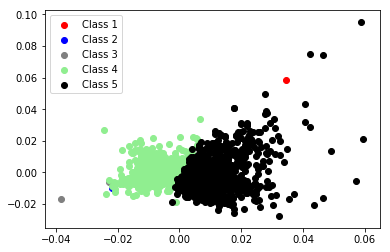

In [17]:
plt.scatter(transformed[labels==0][0], transformed[labels==0][1], label='Class 1', c='red')
plt.scatter(transformed[labels==1][0], transformed[labels==1][1], label='Class 2', c='blue')
plt.scatter(transformed[labels==2][0], transformed[labels==2][1], label='Class 3', c='gray')
plt.scatter(transformed[labels==3][0], transformed[labels==3][1], label='Class 4', c='lightgreen')
plt.scatter(transformed[labels==4][0], transformed[labels==4][1], label='Class 5', c='black')

plt.legend()
plt.show()

Using tf-idf features

In [18]:
# Initialize the model and preprocess
tfidf = TfIdfFeatureExtractor()
tfidf.preprocess(data)

In [19]:
# Extract fetures and create a numpy array of features
X_data_tfidf = tfidf.extract(data)

In [56]:
model2 = Kmeans()
labels_tfidf = model2.cluster(X_data_tfidf, k = 5)

0.279131671658
0.248232934332
0.248223818058
0.248225147854
0.24823624921
0.24823782206
0.248238850023
0.248238850023
0.248238850023
0.248238850023


In [60]:
#this block will not be used now
# import pickle
# with open('submission.pickle','wb') as h:
#     pickle.dump(labels_tfidf,h)
    
# # for i in range(labels.shape[0]):
# #     print(labels[i],end="      ")
# #print(labels)

# dic = {}
# for i in range(labels_tfidf.shape[0]):
#     #print(labels[i],end="      ")
#     dic[labels_tfidf[i]] = dic.get(labels_tfidf[i],0)+1
# print(dic)

{0.0: 187, 1.0: 1, 2.0: 2272, 3.0: 39, 4.0: 1}


In [58]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_data_tfidf))

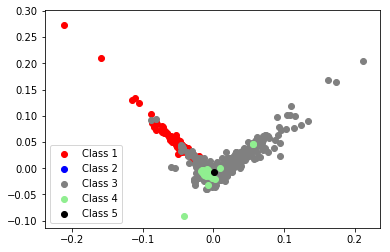

In [59]:
plt.scatter(transformed[labels_tfidf==0][0], transformed[labels_tfidf==0][1], label='Class 1', c='red')
plt.scatter(transformed[labels_tfidf==1][0], transformed[labels_tfidf==1][1], label='Class 2', c='blue')
plt.scatter(transformed[labels_tfidf==2][0], transformed[labels_tfidf==2][1], label='Class 3', c='gray')
plt.scatter(transformed[labels_tfidf==3][0], transformed[labels_tfidf==3][1], label='Class 4', c='lightgreen')
plt.scatter(transformed[labels_tfidf==4][0], transformed[labels_tfidf==4][1], label='Class 5', c='black')

plt.legend()
plt.show()

In [61]:
import pickle
with open('submission.pickle','wb') as h:
    pickle.dump(labels,h)
    pickle.dump(labels_tfidf,h)

In [63]:
#to unpack the data

import pickle
with open('submission.pickle','rb') as h:
    bow = pickle.load(h)
    tfidf = pickle.load(h)

    #checking the values
dic = {}
for i in range(bow.shape[0]):
    #print(labels[i],end="      ")
    dic[bow[i]] = dic.get(bow[i],0)+1
print(dic)

dic = {}
for i in range(tfidf.shape[0]):
    #print(labels[i],end="      ")
    dic[tfidf[i]] = dic.get(tfidf[i],0)+1
print(dic)

{0.0: 1, 1.0: 1, 2.0: 2, 3.0: 1587, 4.0: 909}
{0.0: 187, 1.0: 1, 2.0: 2272, 3.0: 39, 4.0: 1}
